In [ ]:
# Getting the required imports
import numpy as np
from sklearn.model_selection import train_test_split

# Parse the csv file into input X and output Y dataframes.
df = pd.read_csv('diabetes.csv')
x = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df[['Outcome']]

# Test train split returns the following vals.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614, 1), (154, 1))

In [ ]:
# Define a class to implement Logistic Regression Model
class LogisticRegressorModel:
    def __init__(self, num_of_iterations, learn_rate):
        self.num_of_iterations = num_of_iterations
        self.learn_rate = learn_rate
        self.params = {}
    
    # Basic sigmoid function.
    def sigmoid_function(self, x):
        return 1/(1 + np.exp(-x))

    # Cost funciton to calculate
    def cost_func(self, A, Y):
        cost = (-1/Y.shape[1])*(np.dot(Y, np.log(A).T) + np.dot(1-Y, np.log(1-A).T))
        cost = np.squeeze(cost) 
        return cost
   
    # Perfrom forward propagation and retrun new sigmoid function val.
    def forward_prop(self, X):
        Weights = self.params['Weights']
        bias = self.params['bias']
        return self.sigmoid_function(np.dot(Weights, X) + bias)

    # Back propagation
    def back_prop(self, A, X, Y):
        m = Y.shape[1]
        dW = np.dot(A - Y, X.T)/m
        db = np.sum(A - Y, axis=1, keepdims=True)
        # Return the results
        return {
            "dZ": A - Y,
            "dW": dW,
            "db": db
        }

    # Gradient descent funciton.
    def gradient_descent(self, X, Y):  
         # Loop thru the given number of itrs.
        for i in range(self.num_of_iterations):
            # Get the updated value from froward prop.
            A = self.forward_prop(X)
            # Display the cost function decrement periodically.
            if (i+1)%100 == 0:
                cost_fun_val = self.cost_func(A, Y)
                print("Cost after ", i+1, " iterations: ", cost_fun_val)
            # Update the weights and bias with the gradient value.
            gradient = self.back_prop(A, X, Y)
            self.params['Weights'] = self.params['Weights'] - self.learn_rate*gradient['dW']
            self.params['bias'] = self.params['bias'] - self.learn_rate*gradient['db']

    # Algo fit method to fix the number of variables.
    def algo_fit(self, X, Y):
        X = np.array(X).T
        Y = np.array(Y).reshape(1, -1)
        # Update or initiate the weights with num of features.
        self.update_weights(X.shape[0])
        # Then perform gradient descent.
        self.gradient_descent(X, Y)
     
     # To periodically update the weights and bias.
    def update_weights(self, num_of_features):
        Weights = np.zeros((1, num_of_features))
        bias = np.zeros((1, 1))
        self.params = {
            'Weights': Weights,
            'bias': bias
        }

    # Predict method.
    def predict(self, X):
        X = np.array(X).T
        m = X.shape[1] 
        updated_sigmoid_func = self.sigmoid_function(np.dot(self.params['Weights'], X) + self.params['bias'])
        # List to hold predictions.
        predictions = []
        # Loop thru...
        for i in range(m):
          # Based on sigmoid func val, update the predictions.
            if updated_sigmoid_func[0, i] > 0.5:
                predictions.append(1)
            else:
                predictions.append(0)

        return predictions

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standar scaler for transform.
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train[0]

array([0.90832902, 0.91569367, 0.44912368, 0.52222619, 0.3736349 ,
       0.37852648, 0.67740401, 1.69955804])

In [ ]:
regressor = LogisticRegressorModel(num_of_iterations=1000, learn_rate=0.01)
regressor.algo_fit(X_train, y_train)

Cost after  100  iterations:  0.5820723484780445
Cost after  200  iterations:  0.5468179462281312
Cost after  300  iterations:  0.5273095943100121
Cost after  400  iterations:  0.5153374471834256
Cost after  500  iterations:  0.5074147106163546
Cost after  600  iterations:  0.5018797488291877
Cost after  700  iterations:  0.4978579696411472
Cost after  800  iterations:  0.49484977131061125
Cost after  900  iterations:  0.4925500562434358
Cost after  1000  iterations:  0.49076213347326897


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = regressor.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc_score)

Accuracy:  0.8181818181818182


**Part 2 Implement Neural Networks with base line models and regularisation l1**

In [ ]:
import numpy 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras


Train using Neural notworks:

In [152]:
# Read data file
data = pd.read_csv("diabetes.csv")
seed = 5
numpy.random.seed(seed)
df = pd.read_csv('diabetes.csv')
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df[['Outcome']]
print(X.shape)

(768, 8)


In [153]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614, 1), (154, 1))

In [154]:
# Baseline model for the neural network. 
# We choose two hidden layers of 32 and 16 layers.

# create model
model = Sequential()
model.add(Dense(32, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(16, kernel_initializer='normal', activation='relu'))

model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_19 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________
None


In [162]:
model_plt1 = model.fit(X_train,y_train,
          batch_size=64,
          epochs=250,
          validation_split=0.2, shuffle=True
          )
print(model.summary())

Epoch 1/250
8/8 [==============================] - 0s 12ms/step - loss: 0.4211 - accuracy: 0.8065 - val_loss: 0.6437 - val_accuracy: 0.6992
Epoch 2/250
8/8 [==============================] - 0s 4ms/step - loss: 0.4237 - accuracy: 0.8147 - val_loss: 0.6288 - val_accuracy: 0.6667
Epoch 3/250
8/8 [==============================] - 0s 4ms/step - loss: 0.4355 - accuracy: 0.8024 - val_loss: 0.6318 - val_accuracy: 0.6667
Epoch 4/250
8/8 [==============================] - 0s 5ms/step - loss: 0.4197 - accuracy: 0.8106 - val_loss: 0.6367 - val_accuracy: 0.7154
Epoch 5/250
8/8 [==============================] - 0s 4ms/step - loss: 0.4173 - accuracy: 0.8126 - val_loss: 0.6206 - val_accuracy: 0.6829
Epoch 6/250
8/8 [==============================] - 0s 4ms/step - loss: 0.4189 - accuracy: 0.7984 - val_loss: 0.6475 - val_accuracy: 0.6992
Epoch 7/250
8/8 [==============================] - 0s 4ms/step - loss: 0.4377 - accuracy: 0.8045 - val_loss: 0.6349 - val_accuracy: 0.6911
Epoch 8/250
8/8 [=========

Adding regularisation param

In [ ]:
# create model
model2 = Sequential()
model2.add(Dense(16, kernel_initializer='normal', kernel_regularizer= keras.regularizers.l1(0.001), activation='relu'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model_plt = model2.fit(X_train,y_train,
          batch_size=64,
          epochs=250,
          validation_split=0.2, shuffle=True
          )
print(model2.summary())

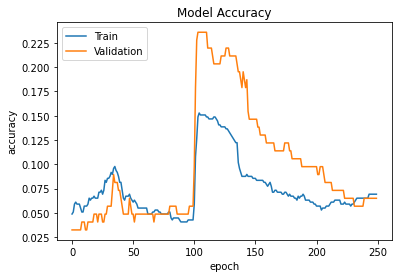

In [158]:
plt.plot(model_plt.history['accuracy'])
plt.plot(model_plt.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [159]:
# Baseline model for the neural network. 
# We choose two hidden layers of 32 and 16 layers.

# create model
model3 = Sequential()
model3.add(Dense(32, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
model3.add(keras.layers.Dropout(0.2))
model3.add(Dense(16, kernel_initializer='normal', activation='relu'))

model3.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_plt3 = model3.fit(X_train,y_train,
          batch_size=64,
          epochs=250,
          validation_split=0.2, shuffle=True
          )
print(model3.summary())



Epoch 1/250
8/8 [==============================] - 1s 27ms/step - loss: 0.6835 - accuracy: 0.5825 - val_loss: 0.6554 - val_accuracy: 0.6829
Epoch 2/250
8/8 [==============================] - 0s 4ms/step - loss: 0.6756 - accuracy: 0.6273 - val_loss: 0.6532 - val_accuracy: 0.6829
Epoch 3/250
8/8 [==============================] - 0s 4ms/step - loss: 0.6776 - accuracy: 0.6253 - val_loss: 0.6549 - val_accuracy: 0.6829
Epoch 4/250
8/8 [==============================] - 0s 4ms/step - loss: 0.6657 - accuracy: 0.6293 - val_loss: 0.6502 - val_accuracy: 0.6829
Epoch 5/250
8/8 [==============================] - 0s 4ms/step - loss: 0.6696 - accuracy: 0.6212 - val_loss: 0.6520 - val_accuracy: 0.6829
Epoch 6/250
8/8 [==============================] - 0s 7ms/step - loss: 0.6556 - accuracy: 0.6375 - val_loss: 0.6470 - val_accuracy: 0.6829
Epoch 7/250
8/8 [==============================] - 0s 5ms/step - loss: 0.6574 - accuracy: 0.6456 - val_loss: 0.6425 - val_accuracy: 0.6585
Epoch 8/250
8/8 [=========

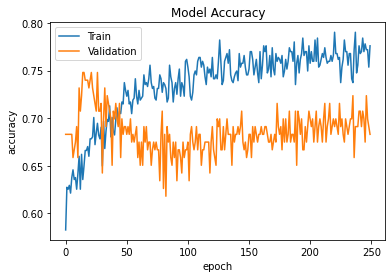

In [160]:
plt.plot(model_plt3.history['accuracy'])
plt.plot(model_plt3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()